#Library

In [ ]:
import kagglehub
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #library visualisasi data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler




# Data acquisisition

In [ ]:
# Unduh dataset dari Kaggle
path = kagglehub.dataset_download("brmil07/telecommunications-company-stock-price")

print("Path to dataset files:", path)


100%|██████████| 71.6k/71.6k [00:00<00:00, 357kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/brmil07/telecommunications-company-stock-price/versions/1


In [ ]:
# Path ke file CSV di folder dataset yang diunduh
dataset_path = path + "/Stock_TLKM_2005-2024.csv"  # Sesuaikan nama file dengan dataset Anda
df = pd.read_csv(dataset_path)

# Lihat sekilas data
print(df.head(-5))



            Date    Open    High     Low   Close    Adj Close       Volume
0     2005-01-26   965.0   975.0   965.0   970.0   548.346130   84725000.0
1     2005-01-27   970.0   970.0   960.0   960.0   542.692932  134222500.0
2     2005-01-28   965.0   965.0   955.0   960.0   542.692932  100760000.0
3     2005-01-31   960.0   965.0   950.0   960.0   542.692932  137322500.0
4     2005-02-01   965.0   975.0   960.0   965.0   545.519531   69960000.0
...          ...     ...     ...     ...     ...          ...          ...
4695  2024-01-17  4000.0  4010.0  3970.0  3990.0  3990.000000   62728400.0
4696  2024-01-18  3990.0  4010.0  3930.0  3950.0  3950.000000   73029300.0
4697  2024-01-19  3950.0  3960.0  3890.0  3940.0  3940.000000   67016100.0
4698  2024-01-22  3980.0  4010.0  3960.0  3980.0  3980.000000   50643700.0
4699  2024-01-23  4000.0  4010.0  3910.0  3950.0  3950.000000   72595400.0

[4700 rows x 7 columns]


In [ ]:
df.shape

(4705, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4705 entries, 0 to 4704
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4705 non-null   object 
 1   Open       4704 non-null   float64
 2   High       4704 non-null   float64
 3   Low        4704 non-null   float64
 4   Close      4704 non-null   float64
 5   Adj Close  4704 non-null   float64
 6   Volume     4704 non-null   float64
dtypes: float64(6), object(1)
memory usage: 257.4+ KB


In [ ]:
# # Konversi kolom 'Date' ke format datetime dan set sebagai indeks
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4705 entries, 0 to 4704
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4705 non-null   datetime64[ns]
 1   Open       4704 non-null   float64       
 2   High       4704 non-null   float64       
 3   Low        4704 non-null   float64       
 4   Close      4704 non-null   float64       
 5   Adj Close  4704 non-null   float64       
 6   Volume     4704 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 257.4 KB


In [ ]:
df.set_index('Date', inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4705 entries, 2005-01-26 to 2024-01-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4704 non-null   float64
 1   High       4704 non-null   float64
 2   Low        4704 non-null   float64
 3   Close      4704 non-null   float64
 4   Adj Close  4704 non-null   float64
 5   Volume     4704 non-null   float64
dtypes: float64(6)
memory usage: 257.3 KB


In [ ]:
df.describe(include="all")

,Open,High,Low,Close,Adj Close,Volume
count,4704.000000,4704.000000,4704.000000,4704.000000,4704.000000,4.704000e+03
mean,2694.108418,2724.414328,2663.815901,2694.080570,2164.720298,9.997381e+07
std,1113.547031,1122.236930,1104.612322,1113.399039,1127.418562,6.505964e+07
min,820.000000,845.000000,820.000000,835.000000,472.029846,0.000000e+00
25%,1640.000000,1660.000000,1620.000000,1640.000000,1114.999847,6.075632e+07
50%,2640.000000,2695.000000,2607.500000,2645.000000,2101.097168,8.584500e+07
75%,3800.000000,3830.000000,3760.000000,3800.000000,3193.085938,1.218750e+08
max,4850.000000,4850.000000,4780.000000,4800.000000,4558.169922,1.155861e+09


**Berdasarkan rangkuman parameter statistik diatas, kita meperoleh informasi**

1. bahwa pada harga saham penutup setelah penyusuain(Bagi dividen atau penyesuian yang lainnya terjadi) **adj close**  rata rata berkisar Rp 2.160 dan harga tertinggi pada Rp 4.558

2. Volume rata rata perdagangan pada PT. telkom Indonesia berkisar 9,99 juta saham per hari

In [ ]:
# Cek apakah ada nilai NaN di seluruh DataFrame
print(df.isna().any())


Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool


In [ ]:
# Hitung jumlah nilai NaN di setiap kolom
print(df.isna().sum())


Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64


In [ ]:
# Tampilkan semua baris dengan nilai NaN
nan_rows = df[df.isna().any(axis=1)]
print(nan_rows)


            Open  High  Low  Close  Adj Close  Volume
Date                                                 
2019-06-19   NaN   NaN  NaN    NaN        NaN     NaN


In [ ]:
# Menghapus baris dengan nilai NaN
df_cleaned = df.dropna()

# Atau, langsung memperbarui DataFrame asli
df.dropna(inplace=True)


In [ ]:
# Tampilkan semua baris dengan nilai NaN
nan_rows = df[df.isna().any(axis=1)]
print(nan_rows)


Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [ ]:
# # 4. Select 'Adj Close' column for prediction
# data = df['Adj Close'].values
df.head(-5)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-26,965.0,975.0,965.0,970.0,548.346130,84725000.0
2005-01-27,970.0,970.0,960.0,960.0,542.692932,134222500.0
2005-01-28,965.0,965.0,955.0,960.0,542.692932,100760000.0
2005-01-31,960.0,965.0,950.0,960.0,542.692932,137322500.0
2005-02-01,965.0,975.0,960.0,965.0,545.519531,69960000.0
...,...,...,...,...,...,...
2024-01-17,4000.0,4010.0,3970.0,3990.0,3990.000000,62728400.0
2024-01-18,3990.0,4010.0,3930.0,3950.0,3950.000000,73029300.0
2024-01-19,3950.0,3960.0,3890.0,3940.0,3940.000000,67016100.0


# Data exploration

<Axes: xlabel='Date', ylabel='Close'>

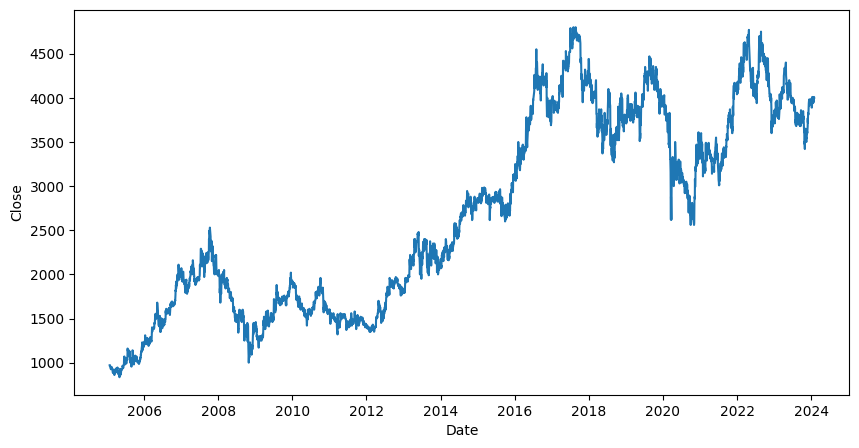

In [ ]:
plt.figure (figsize=(10,5))
sns.lineplot(data=df, x='Date', y='Close')

In [ ]:
df = df[['Adj Close', 'Close']]
df.head()

,Adj Close,Close
Date,,
2005-01-26,548.346130,970.0
2005-01-27,542.692932,960.0
2005-01-28,542.692932,960.0
2005-01-31,542.692932,960.0
2005-02-01,545.519531,965.0


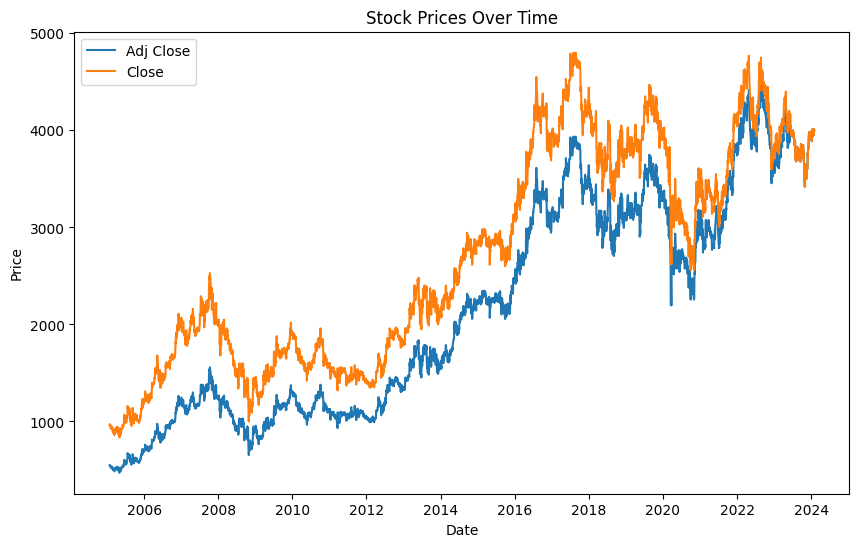

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Adj Close'], label='Adj Close')
plt.plot(df.index, df['Close'], label='Close')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices Over Time')

plt.legend()

plt.show()

In [ ]:
df = df[["Adj Close"]]
df.head()

,Adj Close
Date,
2005-01-26,548.346130
2005-01-27,542.692932
2005-01-28,542.692932
2005-01-31,542.692932
2005-02-01,545.519531


In [ ]:
# Normalisasi kolom 'Adj Close' dengan Min-Max Scaling
Adj_Close = df[['Adj Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = df['Scaled Adj Close'] = scaler.fit_transform(Adj_Close)

In [ ]:
# Menentukan banyaknya data train yaitu sebesar 80% data
train_size = int(len(df) * 0.7)
train = df[:train_size]
test = df[train_size:].reset_index(drop=True)

In [ ]:
# 6. Create sliding window
def create_sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 10   # Number of previous days used for prediction
X, y = create_sliding_window(data_scaled, window_size)

# 7. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data to 3D for LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
df.head()

,Adj Close,Scaled Adj Close
Date,,
2005-01-26,548.346130,0.018677
2005-01-27,542.692932,0.017293
2005-01-28,542.692932,0.017293
2005-01-31,542.692932,0.017293
2005-02-01,545.519531,0.017985


# Build Model

In [ ]:
print("Shape X_train:", X_train.shape)
print("Shape y_train:", y_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_test:", y_test.shape)


Shape X_train: (3755, 10, 1)
Shape y_train: (3755, 1)
Shape X_test: (939, 10, 1)
Shape y_test: (939, 1)


In [ ]:
# Define custom accuracy metric for regression (MAPE-based accuracy)
def mape_accuracy(y_true, y_pred):
    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    # Convert MAPE to accuracy percentage
    accuracy = 100 - mape * 100
    return accuracy

##LSTM

In [ ]:
# prompt: buatkan model LSTM

# Build LSTM model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Data: {loss}")

from sklearn.metrics import mean_absolute_percentage_error

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values to get the original scale
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))


# Calculate MAPE
mape = mean_absolute_percentage_error(y_test_original, y_pred_original)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# Calculate accuracy based on MAPE
accuracy = 100 - mape * 100
print(f"Accuracy: {accuracy:.2f}%")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0620
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0033
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0026
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0023
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0021
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0021
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0022
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0019
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0018
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0021
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0018
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021
Epoch 13/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017
Epoch 16/


## Bidirectional LSTM

In [ ]:
# 8. Build Bidirectional LSTM model
model = Sequential([
    Bidirectional(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.2),
    Bidirectional(LSTM(50)),
    Dropout(0.2),
    Dense(1)
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# 9. Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0598
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0012
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0010
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0011
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0012
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0010
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.8274e-04
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0010    
Epoch 13/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0010
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0010
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.5951e-04
Epoch 16/20
59/

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 10, 200)             │          81,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 10, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 100)                 │         100,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 546,305 (2.08 MB)

 Trainable params: 182,101 (711.33 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364,204 (1.39 MB)

In [ ]:
# 10. Evaluate the model BILSTM
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Calculate accuracy based on MAPE
accuracy = 100 - loss * 100
print(f"Accuracy: {accuracy:.2f}%")



30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5910e-04
Test Loss: 0.0002692535927053541
Accuracy: 99.97%


In [ ]:
# 11. Predict on test data
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inverse = scaler.inverse_transform(y_pred)



30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


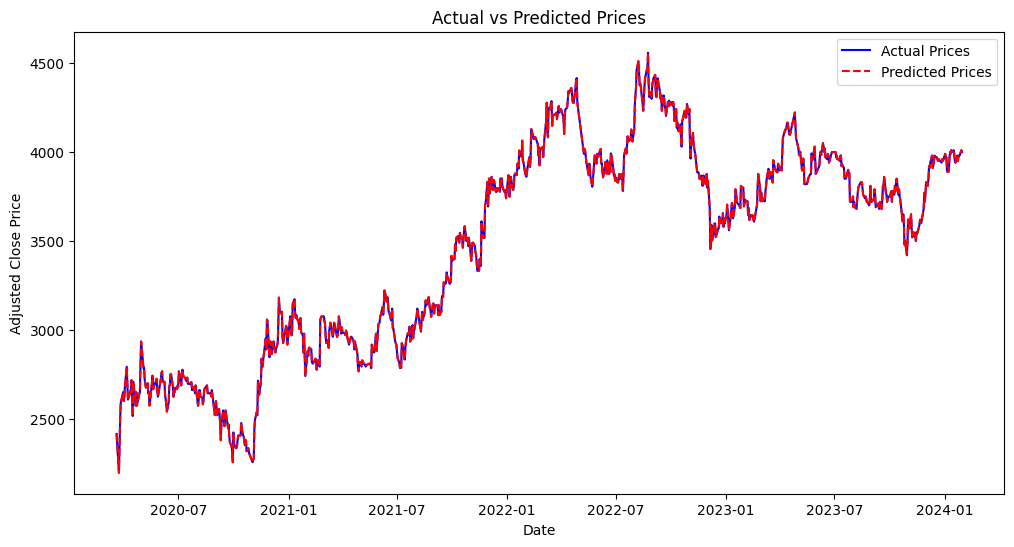

In [ ]:
# ... kode sebelumnya ...

# 12. Visualize predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test_inverse):], df[-len(y_test_inverse):]['Adj Close'], label='Actual Prices', color='blue')  # Menggunakan df.index
plt.plot(df.index[-len(y_pred_inverse):],  df[-len(y_pred_inverse):]['Adj Close'], label='Predicted Prices', color='red', linestyle='dashed')  # Jika tidak dikomentari
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

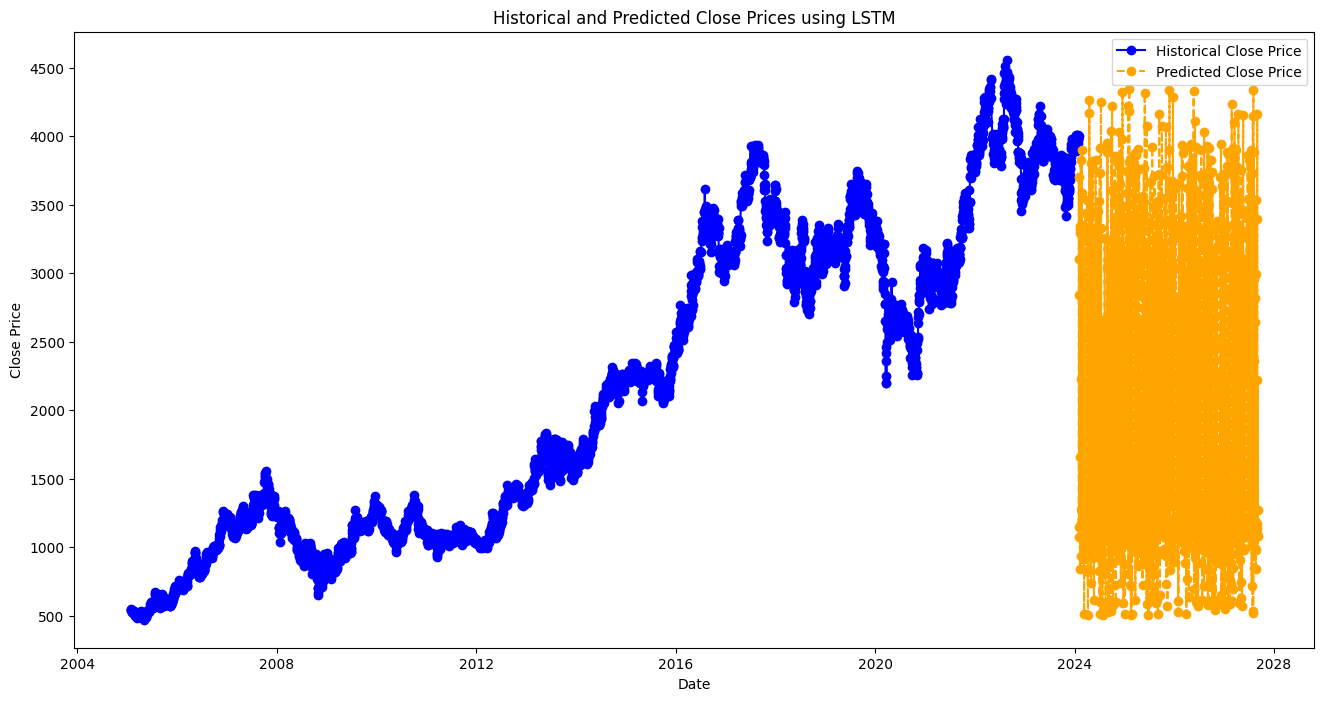

In [ ]:
# Update the column name used for Close Prices
close_price_column = 'Adj Close'

# Plot the historical Close Prices
plt.figure(figsize=(16, 8))
plt.plot(df.index, df[close_price_column], label='Historical Close Price', marker='o', linestyle='-', color='b')

# Plot the predicted Close Prices
predicted_dates = pd.date_range(start=df.index[-1], periods=len(y_pred_inverse)+1, freq='B')[1:]
plt.plot(predicted_dates, y_pred_inverse, label='Predicted Close Price', linestyle='dashed', color='orange', marker='o')

plt.title('Historical and Predicted Close Prices using LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [ ]:
def predict_future_price(days_ahead, last_known_data, model, scaler):
    """
    Memprediksi harga saham untuk beberapa hari ke depan.

    Args:
        days_ahead: Jumlah hari ke depan yang ingin diprediksi.
        last_known_data: Data terakhir yang diketahui (window_size data terakhir).
        model: Model LSTM yang telah dilatih.
        scaler: MinMaxScaler yang digunakan untuk scaling data.

    Returns:
        List harga saham yang diprediksi untuk setiap hari ke depan.
    """
    predicted_prices = []
    current_data = last_known_data.reshape(1, window_size, 1)  # Reshape ke bentuk yang sesuai untuk model

    for _ in range(days_ahead):
        # Prediksi harga untuk hari berikutnya
        next_price = model.predict(current_data)
        # Tambahkan prediksi ke list
        predicted_prices.append(next_price[0])
        # Update current_data dengan prediksi terbaru
        current_data = np.append(current_data[:, 1:, :], next_price.reshape(1, 1, 1), axis=1)

    # Inverse transform untuk mendapatkan harga asli
    predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

    return predicted_prices

Masukkan jumlah hari ke depan yang ingin diprediksi: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediksi harga saham untuk hari ke-1: Rp 3,943.33
Prediksi harga saham untuk hari ke-2: Rp 3,938.78
Prediksi harga saham untuk hari ke-3: Rp 3,935.37
Prediksi harga saham untuk hari ke-4: Rp 3,931.73
Prediksi harga saham untuk hari ke-5: Rp 3,925.95


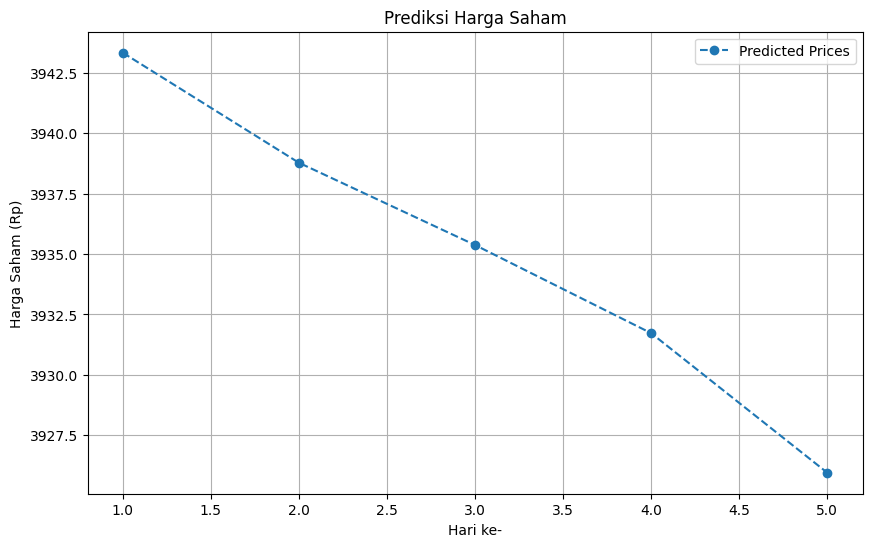

In [ ]:
# Data terakhir dari dataset yang telah diskalakan
last_known_data = data_scaled[-window_size:]  # Ambil window_size data terakhir dari data scaled

# Input jumlah hari ke depan untuk prediksi
days_ahead = int(input("Masukkan jumlah hari ke depan yang ingin diprediksi: "))

# Prediksi hari ke-berapa
predicted_prices = predict_future_price(days_ahead, last_known_data, model, scaler)

# Tampilkan hasil prediksi
for i, price in enumerate(predicted_prices, start=1):
    print(f"Prediksi harga saham untuk hari ke-{i}: Rp {price[0]:,.2f}")

# Visualisasi hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(range(1, days_ahead + 1), predicted_prices, label="Predicted Prices", marker='o', linestyle='--')
plt.title("Prediksi Harga Saham")
plt.xlabel("Hari ke-")
plt.ylabel("Harga Saham (Rp)")
plt.legend()
plt.grid()
plt.show()


#Deploy model

In [ ]:
model.save("lstm_model.h5")

In [ ]:
!pip install -r /content/drive/MyDrive/Kampus/Skripsi/requirements.txt

In [ ]:
import numpy as np

# Inisialisasi variabel
n_steps = 100  # Sesuai dengan panjang sequence input yang digunakan saat training
future_days = 30  # Jumlah hari yang ingin diprediksi
temp_input = list(X_test[-1])  # Ambil sequence terakhir dari data testing untuk memulai prediksi
lst_output = []  # Menyimpan hasil prediksi

i = 0
while i < future_days:
    if len(temp_input) > n_steps:
        # Ambil bagian terakhir dari temp_input sebagai input untuk prediksi
        x_input = np.array(temp_input[-n_steps:])
        x_input = x_input.reshape((1, n_steps, 1))  # Sesuaikan bentuk input dengan model
        # Prediksi langkah berikutnya
        yhat = model.predict(x_input, verbose=0)
        # Simpan hasil prediksi
        lst_output.extend(yhat.tolist())
        temp_input.extend(yhat[0].tolist())
        i += 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        lst_output.extend(yhat.tolist())
        temp_input.extend(yhat[0].tolist())
        i += 1

# Output prediksi
print("Prediksi untuk 30 hari ke depan:", lst_output)

# Visualisasi prediksi
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(len(lst_output)), [y[0] for y in lst_output], label='Predicted', color='blue')
plt.title('Prediksi 30 Hari ke Depan')
plt.xlabel('Days')
plt.ylabel('Price (Normalized)')
plt.legend()
plt.grid()
plt.show()


ValueError: cannot reshape array of size 30 into shape (1,100,1)

#Libary Yfinance

In [ ]:
import yfinance as yf
dat = yf.Ticker("TLKM.JK")

In [ ]:
dat = yf.Ticker("TLKM.JK")
dat.info
dat.calendar
dat.analyst_price_targets
dat.quarterly_income_stmt
dat.history(period='1mo')
dat.option_chain(dat.options[0]).calls

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-12-02 00:00:00+07:00,2720.0,2730.0,2680.0,2680.0,66025900,0.0,0.0
2024-12-03 00:00:00+07:00,2760.0,2830.0,2710.0,2820.0,167603900,0.0,0.0
2024-12-04 00:00:00+07:00,2820.0,2850.0,2800.0,2840.0,83412800,0.0,0.0
2024-12-05 00:00:00+07:00,2840.0,2840.0,2730.0,2770.0,96025400,0.0,0.0
2024-12-06 00:00:00+07:00,2740.0,2780.0,2740.0,2760.0,48179800,0.0,0.0
2024-12-09 00:00:00+07:00,2760.0,2770.0,2730.0,2740.0,63671900,0.0,0.0
2024-12-10 00:00:00+07:00,2770.0,2830.0,2750.0,2770.0,124138200,0.0,0.0
2024-12-11 00:00:00+07:00,2770.0,2880.0,2770.0,2860.0,140611400,0.0,0.0
2024-12-12 00:00:00+07:00,2830.0,2850.0,2780.0,2820.0,66977700,0.0,0.0


In [ ]:
# prompt: BUATKAN pengambilan data dari yfinance untuk mengambil data PT telkomsel

import yfinance as yf

# Replace 'TLKM.JK' with the correct ticker symbol for Telkomsel if different
telkomsel_ticker = "TLKM.JK"

# Download historical data
data = yf.download(telkomsel_ticker, period="max")  # You can change period to '1y', '5y', etc.

# Display the downloaded data
data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TLKM.JK,TLKM.JK,TLKM.JK,TLKM.JK,TLKM.JK,TLKM.JK
Date,,,,,,
2004-09-28,403.510101,825.0,835.0,825.0,835.0,90095000
2004-09-29,403.510101,825.0,825.0,810.0,825.0,29370000
2004-09-30,405.955536,830.0,830.0,825.0,825.0,42927500
2004-10-01,410.846649,840.0,845.0,825.0,830.0,108387500
2004-10-04,425.519684,870.0,880.0,845.0,845.0,424210000
...,...,...,...,...,...,...
2024-12-20,2550.000000,2550.0,2570.0,2520.0,2530.0,110308800
2024-12-23,2650.000000,2650.0,2670.0,2580.0,2580.0,72113700
